In [2]:
%cd /content/drive/MyDrive/audioclass

/content/drive/MyDrive/audioclass


In [3]:
!pwd

/content/drive/MyDrive/audioclass


In [4]:
!ls

audio  Untitled0.ipynb


In [5]:
!pip install librosa


In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
import IPython.display as ipd
import librosa
import librosa.display
import os

In [12]:
os.listdir('./audio/sneezing')

['1-47274-A-21.wav',
 '1-29680-A-21.wav',
 '1-26143-A-21.wav',
 '1-47273-A-21.wav',
 '1-31748-A-21.wav',
 '1-59324-A-21.wav',
 '1-54505-A-21.wav',
 '1-81883-A-21.wav',
 '2-118104-A-21.wav',
 '2-128631-A-21.wav',
 '2-130979-A-21.wav',
 '2-119102-A-21.wav',
 '2-109505-A-21.wav',
 '2-130978-A-21.wav',
 '3-143119-A-21.wav',
 '3-144692-A-21.wav',
 '3-142601-A-21.wav',
 '2-93030-A-21.wav',
 '3-141684-A-21.wav',
 '2-82538-A-21.wav',
 '3-142605-A-21.wav',
 '3-150231-A-21.wav',
 '3-148330-A-21.wav',
 '3-156558-A-21.wav',
 '4-156844-A-21.wav',
 '4-171519-A-21.wav',
 '4-157297-A-21.wav',
 '4-156843-A-21.wav',
 '4-167642-A-21.wav',
 '4-184434-A-21.wav',
 '4-185619-A-21.wav',
 '4-185415-A-21.wav',
 '5-194533-A-21.wav',
 '5-201274-A-21.wav',
 '5-202220-A-21.wav',
 '5-187979-A-21.wav',
 '5-221518-A-21.wav',
 '5-220027-A-21.wav',
 '5-220026-A-21.wav',
 '5-221593-A-21.wav']

In [55]:
filename = './audio/sneezing/1-47274-A-21.wav'

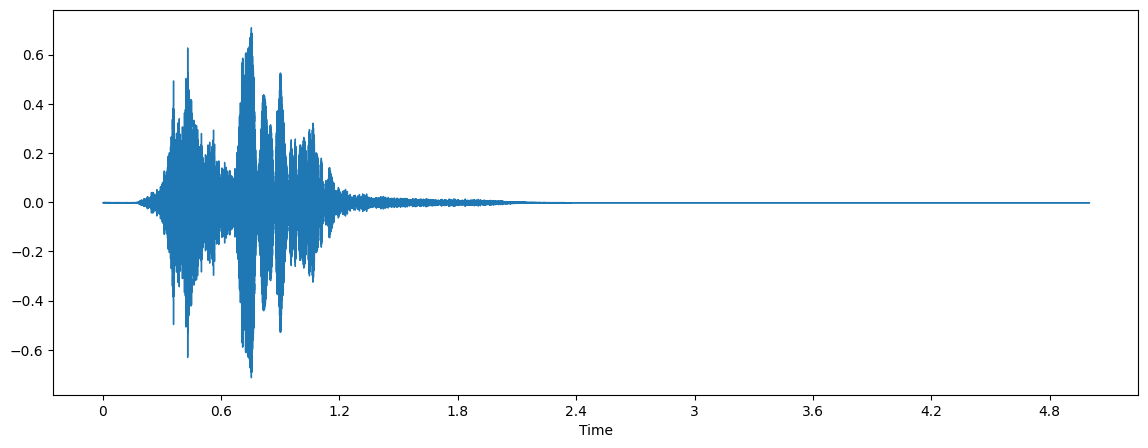

In [17]:
### Dog Sound
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename)
librosa.display.waveshow(data,sr=sample_rate)
ipd.Audio(filename)

In [18]:
data

array([ 1.7052444e-04,  4.5375229e-05, -2.4610257e-04, ...,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00], dtype=float32)

In [19]:
sample_rate

22050

Extract Featurees MFCCs

In [37]:
import numpy as np
import pandas as pd

In [48]:
def features_extractor(file_name):
    audio, sample_rate = librosa.load(file_name)
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

    return mfccs_scaled_features

In [31]:
df_dict = {
    'audio_path':[],
    'class':[]
}

In [32]:
df_dict['audio_path'].extend(os.listdir('./audio/sneezing'))
df_dict['class'].extend(['sneezing']*40)


In [35]:
df_dict['audio_path'].extend(os.listdir('./audio/snoring'))
df_dict['class'].extend(['snoring']*40)

In [39]:
df = pd.DataFrame(df_dict)

In [42]:
df['full_path'] = './audio/' + df['class'] + '/' + df['audio_path']
df

,audio_path,class,full_path
0,1-47274-A-21.wav,sneezing,./audio/sneezing/1-47274-A-21.wav
1,1-29680-A-21.wav,sneezing,./audio/sneezing/1-29680-A-21.wav
2,1-26143-A-21.wav,sneezing,./audio/sneezing/1-26143-A-21.wav
3,1-47273-A-21.wav,sneezing,./audio/sneezing/1-47273-A-21.wav
4,1-31748-A-21.wav,sneezing,./audio/sneezing/1-31748-A-21.wav
...,...,...,...
75,5-249748-A-28.wav,snoring,./audio/snoring/5-249748-A-28.wav
76,5-236288-A-28.wav,snoring,./audio/snoring/5-236288-A-28.wav
77,5-235893-A-28.wav,snoring,./audio/snoring/5-235893-A-28.wav
78,5-233312-A-28.wav,snoring,./audio/snoring/5-233312-A-28.wav


In [49]:
df['data'] = df['full_path'].apply(lambda x: features_extractor(x))
df

,audio_path,class,full_path,data
0,1-47274-A-21.wav,sneezing,./audio/sneezing/1-47274-A-21.wav,"[-431.03986, 25.75126, -12.491915, -5.5945735,..."
1,1-29680-A-21.wav,sneezing,./audio/sneezing/1-29680-A-21.wav,"[-564.828, 17.101517, 3.9772863, 2.6948593, 4...."
2,1-26143-A-21.wav,sneezing,./audio/sneezing/1-26143-A-21.wav,"[-549.97864, 11.583736, -9.787648, 0.4661556, ..."
3,1-47273-A-21.wav,sneezing,./audio/sneezing/1-47273-A-21.wav,"[-665.4829, 21.296469, -3.857877, 2.1164353, -..."
4,1-31748-A-21.wav,sneezing,./audio/sneezing/1-31748-A-21.wav,"[-639.49774, 14.532851, -2.4392033, 3.3472579,..."
...,...,...,...,...
75,5-249748-A-28.wav,snoring,./audio/snoring/5-249748-A-28.wav,"[-466.6375, 88.105576, 37.86911, 16.008547, -8..."
76,5-236288-A-28.wav,snoring,./audio/snoring/5-236288-A-28.wav,"[-421.70145, 83.956635, 2.4878778, 17.041492, ..."
77,5-235893-A-28.wav,snoring,./audio/snoring/5-235893-A-28.wav,"[-523.5155, 63.97527, 29.909636, 24.513552, -0..."
78,5-233312-A-28.wav,snoring,./audio/snoring/5-233312-A-28.wav,"[-360.1077, 135.33597, 16.403784, 36.128986, -..."


In [80]:
label_map = {
    'sneezing' : 0,
    'snoring' : 1
}
df['y'] = df['class'].map(label_map)
df

,audio_path,class,full_path,data,y
0,1-47274-A-21.wav,sneezing,./audio/sneezing/1-47274-A-21.wav,"[-431.03986, 25.75126, -12.491915, -5.5945735,...",0
1,1-29680-A-21.wav,sneezing,./audio/sneezing/1-29680-A-21.wav,"[-564.828, 17.101517, 3.9772863, 2.6948593, 4....",0
2,1-26143-A-21.wav,sneezing,./audio/sneezing/1-26143-A-21.wav,"[-549.97864, 11.583736, -9.787648, 0.4661556, ...",0
3,1-47273-A-21.wav,sneezing,./audio/sneezing/1-47273-A-21.wav,"[-665.4829, 21.296469, -3.857877, 2.1164353, -...",0
4,1-31748-A-21.wav,sneezing,./audio/sneezing/1-31748-A-21.wav,"[-639.49774, 14.532851, -2.4392033, 3.3472579,...",0
...,...,...,...,...,...
75,5-249748-A-28.wav,snoring,./audio/snoring/5-249748-A-28.wav,"[-466.6375, 88.105576, 37.86911, 16.008547, -8...",1
76,5-236288-A-28.wav,snoring,./audio/snoring/5-236288-A-28.wav,"[-421.70145, 83.956635, 2.4878778, 17.041492, ...",1
77,5-235893-A-28.wav,snoring,./audio/snoring/5-235893-A-28.wav,"[-523.5155, 63.97527, 29.909636, 24.513552, -0...",1
78,5-233312-A-28.wav,snoring,./audio/snoring/5-233312-A-28.wav,"[-360.1077, 135.33597, 16.403784, 36.128986, -...",1


In [81]:
X = df['data']
X


,data
0,"[-431.03986, 25.75126, -12.491915, -5.5945735,..."
1,"[-564.828, 17.101517, 3.9772863, 2.6948593, 4...."
2,"[-549.97864, 11.583736, -9.787648, 0.4661556, ..."
3,"[-665.4829, 21.296469, -3.857877, 2.1164353, -..."
4,"[-639.49774, 14.532851, -2.4392033, 3.3472579,..."
...,...
75,"[-466.6375, 88.105576, 37.86911, 16.008547, -8..."
76,"[-421.70145, 83.956635, 2.4878778, 17.041492, ..."
77,"[-523.5155, 63.97527, 29.909636, 24.513552, -0..."
78,"[-360.1077, 135.33597, 16.403784, 36.128986, -..."


In [82]:
y = df['y']
y

,y
0,0
1,0
2,0
3,0
4,0
...,...
75,1
76,1
77,1
78,1


In [93]:
### Split the dataset into independent and dependent dataset
X=np.array(df['data'].tolist())
y=np.array(df['y'].tolist())

In [94]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [95]:
X_train


array([[-6.65482910e+02,  2.12964687e+01, -3.85787702e+00, ...,
         1.33749413e+00, -5.44431269e-01,  2.17355281e-01],
       [-4.89174347e+02,  1.83769646e+01, -5.01810646e+00, ...,
         2.46614248e-01,  3.94158959e-01,  2.78790504e-01],
       [-4.84188690e+02,  2.48031902e+01,  6.02510452e+00, ...,
         6.87995553e-01,  6.87001467e-01,  5.47356486e-01],
       ...,
       [-3.92239838e+02,  8.51210556e+01,  2.78904572e+01, ...,
         3.25784469e+00,  2.28944683e+00,  3.49384904e+00],
       [-2.22118881e+02,  1.09430626e+02,  3.64839172e+01, ...,
        -2.06977010e-01, -1.70910716e+00,  4.38253117e+00],
       [-2.88365692e+02,  8.13166428e+01,  2.07323761e+01, ...,
         1.85950267e+00,  1.35128772e+00,  5.85132980e+00]], dtype=float32)

In [97]:
y_train

array([0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1])

In [85]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [86]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(1))
model.add(Activation('sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [87]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 100)                 │           4,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 200)                 │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 100)                 │          20,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             101 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44,501 (173.83 KB)

 Trainable params: 44,501 (173.83 KB)

 Non-trainable params: 0 (0.00 B)

In [88]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer='adam')


In [98]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

num_epochs = 100
num_batch_size = 32




model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), verbose=1)



Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 311ms/step - accuracy: 0.4375 - loss: 49.9418 - val_accuracy: 0.7500 - val_loss: 6.1767
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.5312 - loss: 25.5616 - val_accuracy: 0.2500 - val_loss: 5.6379
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.3958 - loss: 25.6132 - val_accuracy: 0.2500 - val_loss: 18.9411
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - accuracy: 0.5312 - loss: 22.5446 - val_accuracy: 0.2500 - val_loss: 21.5536
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.6250 - loss: 15.0006 - val_accuracy: 0.2500 - val_loss: 19.3646
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.6354 - loss: 16.6925 - val_accuracy: 0.2500 - val_loss: 15.4426
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.5833 - loss: 18.2135 - val_accuracy: 0.2500 - val_loss: 11.3541
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.4792 - loss: 26.3567 - val_accuracy: 0.

In [99]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

1.0


In [102]:
filename = './audio/sneezing/1-47274-A-21.wav'
threshold = 0.5
prediction_feature=features_extractor(filename)
prediction_feature=prediction_feature.reshape(1,-1)
pred = model.predict(prediction_feature)
print((pred > threshold).astype(int))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
[[0]]


In [103]:
filename = './audio/snoring/1-20545-A-28.wav'
threshold = 0.5
prediction_feature=features_extractor(filename)
prediction_feature=prediction_feature.reshape(1,-1)
pred = model.predict(prediction_feature)
print((pred > threshold).astype(int))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
[[1]]
